In [1]:
# Instalación de paquetes necesarios.

import sys
!conda install --yes --prefix {sys.prefix} matplotlib
!conda install --yes --prefix {sys.prefix} numpy

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\rodrigl2\Anaconda3\envs\tutorial

  added / updated specs:
    - matplotlib


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    cycler-0.10.0              |           py37_0          13 KB
    freetype-2.10.4            |       hd328e21_0         466 KB
    kiwisolver-1.3.1           |   py37hd77b12b_0          52 KB
    libtiff-4.2.0              |       hd0e1b90_0         786 KB
    lz4-c-1.9.3                |       h2bbff1b_0         131 KB
    matplotlib-3.3.4           |   py37haa95532_0          27 KB
    matplotlib-base-3.3.4      |   py37h49ac443_0         5.1 MB
    olefile-0.46               |           py37_0          49 KB
    pillow-8.2.0               |   py37h4fa10fc_0         665 KB
    zstd-1.4.9                 |       h19a0ad4_0         478 KB
    ------------------------------

In [2]:
# Carga de los paquetes necesarios.

%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np

In [3]:
# Definición del conjunto de datos.

data = [[3,   1.5, 1],
        [2,   1,   0],
        [4,   1.5, 1],
        [3,   1,   0],
        [3.5, .5,  1],
        [2,   .5,  0],
        [5.5,  1,  1],
        [1,    1,  0]]

mystery_flower = [4.5, 1]

In [4]:
data

[[3, 1.5, 1],
 [2, 1, 0],
 [4, 1.5, 1],
 [3, 1, 0],
 [3.5, 0.5, 1],
 [2, 0.5, 0],
 [5.5, 1, 1],
 [1, 1, 0]]

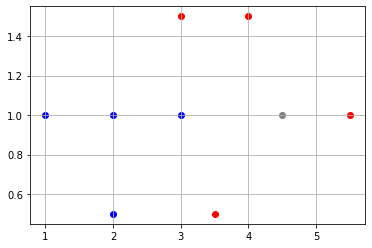

In [5]:
# Visualización de los datos 

def vis_data():
    plt.grid()

    for i in range(len(data)):
        c = 'r'
        if data[i][2] == 0:
            c = 'b'
        plt.scatter([data[i][0]], [data[i][1]], c=c)

    plt.scatter([mystery_flower[0]], [mystery_flower[1]], c='gray')

vis_data()

In [6]:
# Neural Network

#       o  Tipo de flor
#      / \  w1, w2, b
#     o   o  largo, ancho

In [7]:
# Funciones de activación

def sigmoid(x):
    return 1/(1+np.exp(-x))

def sigmoid_p(x):
    return sigmoid(x) * (1-sigmoid(x))

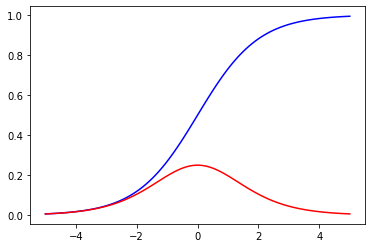

In [8]:
# Grafica de las funciones de activación

X = np.linspace(-5, 5, 100)

plt.plot(X, sigmoid(X), c="b") # Sigmoide en azul

fig = plt.plot(X, sigmoid_p(X), c="r") # sigmoid_p en rojo

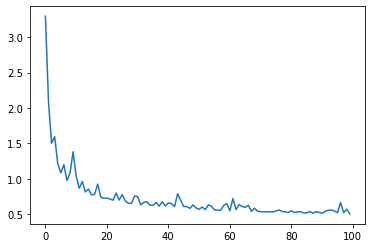

In [9]:
# Entrenamiento de la Red Neuronal

def train():
    
    
    # Inicialización aleatoria de los pesos de la red.
    
    w1 = np.random.randn()
    w2 = np.random.randn()
    b = np.random.randn()
    
    iterations = 10000
    learning_rate = 0.1
    costs = [] # Costos --->> Minimizar 
    
    for i in range(iterations):
        # Valor aleatorio inicial
        ri = np.random.randint(len(data))
        point = data[ri]
        
        z = point[0] * w1 + point[1] * w2 + b
        pred = sigmoid(z) # Predicción de la función Sigmoide
        
        target = point[2]
        
        # Valor de la función de costo (error)
        
        cost = np.square(pred - target)
        
        # Imprimir los valores cada 1000 interaciones
        
        if i % 100 == 0:
            c = 0
            for j in range(len(data)):
                p = data[j]
                p_pred = sigmoid(w1 * p[0] + w2 * p[1] + b)
                c += np.square(p_pred - p[2])
            costs.append(c)
            
        dcost_dpred = 2 * (pred - target)
        dpred_dz = sigmoid_p(z)
        
        dz_dw1 = point[0]
        dz_dw2 = point[1]
        dz_db = 1
        
        dcost_dz = dcost_dpred * dpred_dz
        
        dcost_dw1 = dcost_dz * dz_dw1
        dcost_dw2 = dcost_dz * dz_dw2
        dcost_db = dcost_dz * dz_db
        
        w1 = w1 - learning_rate * dcost_dw1
        w2 = w2 - learning_rate * dcost_dw2
        b = b - learning_rate * dcost_db
        
    return costs, w1, w2, b
        
costs, w1, w2, b = train()

fig = plt.plot(costs)

In [10]:
# Prediccion del valor desconocido

mystery_flower = [3, 1.5]

z = w1 * mystery_flower[0] + w2 * mystery_flower[1] + b
pred = sigmoid(z)

print(pred)
print("Valor cercano a 0 -> Azul, Valor Cercano a 1 -> Rojo")


0.6255750033848206
Valor cercano a 0 -> Azul, Valor Cercano a 1 -> Rojo


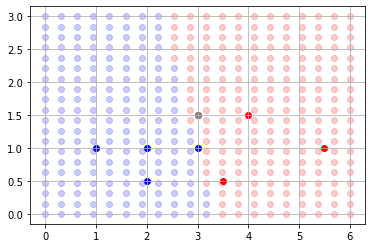

In [11]:
# Visualización completa del modelo creado por la Red Neuronal
for x in np.linspace(0, 6, 20):
    for y in np.linspace(0, 3, 20):
        pred = sigmoid(w1 * x + w2 * y + b)
        c = 'b'
        if pred > .5:
            c = 'r'
        plt.scatter([x],[y],c=c, alpha=.2)
        
# plot points over network predictions
# you should see a split, with half the predictions blue
# and the other half red.. nicely predicting each data point!
vis_data()